In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
plt.rcParams['figure.figsize']=[19,8]

In [45]:
import	warnings
warnings.filterwarnings('ignore')

In [46]:
from sklearn.datasets import load_iris

In [47]:
iris=load_iris()

In [48]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [49]:
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
iris_df['target']=iris.target

In [51]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [54]:
iris_df.duplicated().sum()

1

In [55]:
iris_df.drop_duplicates(inplace=True)

In [56]:
iris_df.duplicated().sum()

0

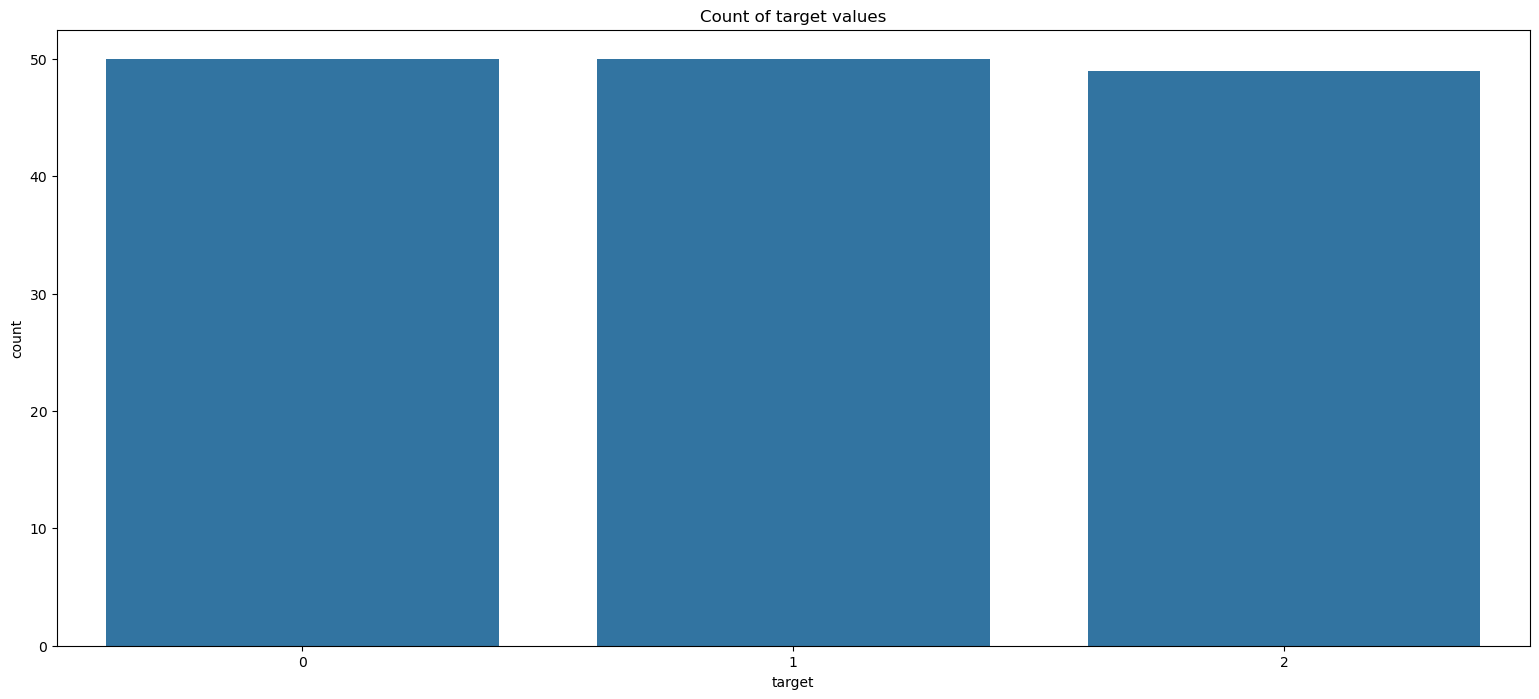

In [57]:
sns.countplot(data=iris_df, x='target')
plt.title("Count of target values")
plt.show()

In [58]:
iris_setosa=iris_df.loc[iris_df['target']==0, :]
iris_versicolor=iris_df.loc[iris_df['target']==1, :]
iris_virginica=iris_df.loc[iris_df['target']==2, :]

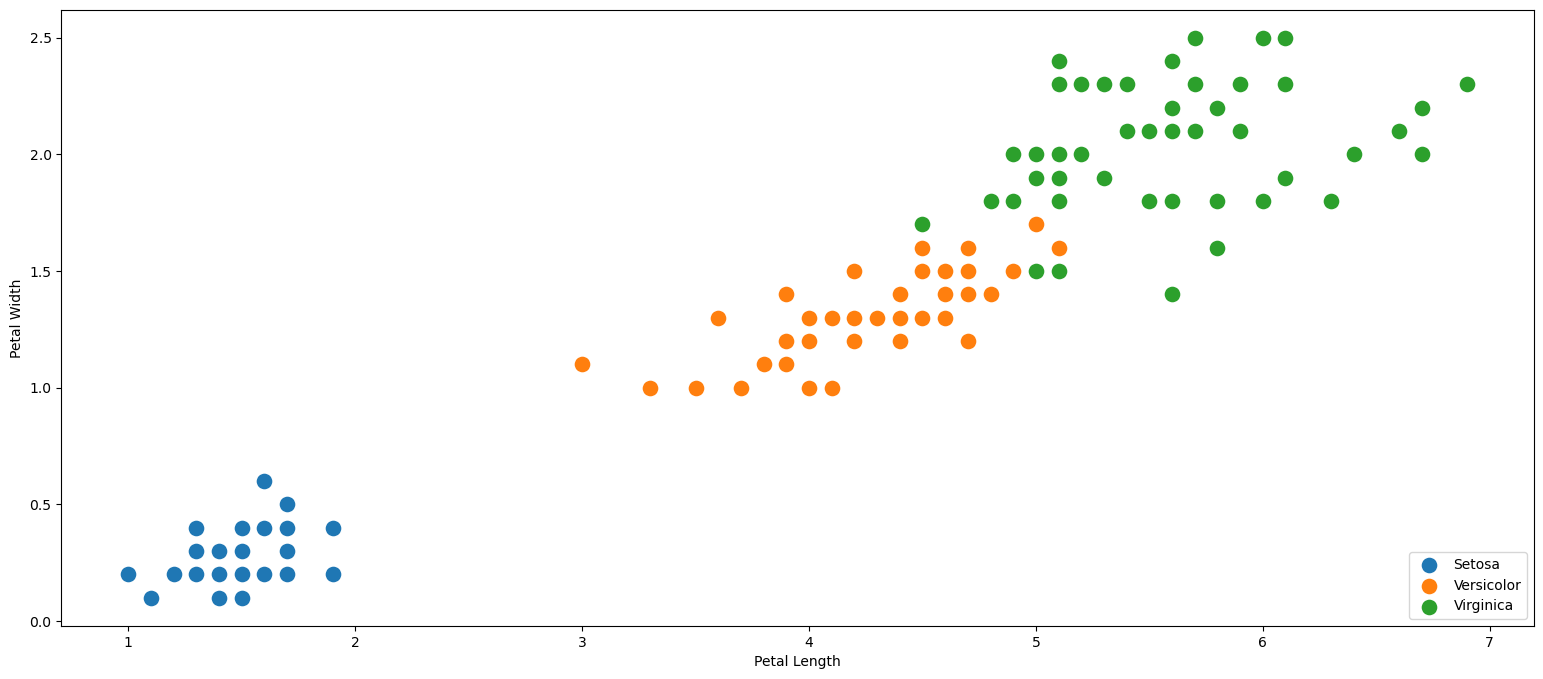

In [59]:
sns.scatterplot(data=iris_setosa, x='petal length (cm)', y='petal width (cm)',s=150)
sns.scatterplot(data=iris_versicolor, x='petal length (cm)', y='petal width (cm)', s=150)
sns.scatterplot(data=iris_virginica, x='petal length (cm)', y='petal width (cm)', s=150)
plt.legend(['Setosa', 'Versicolor', 'Virginica'], loc='lower right')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

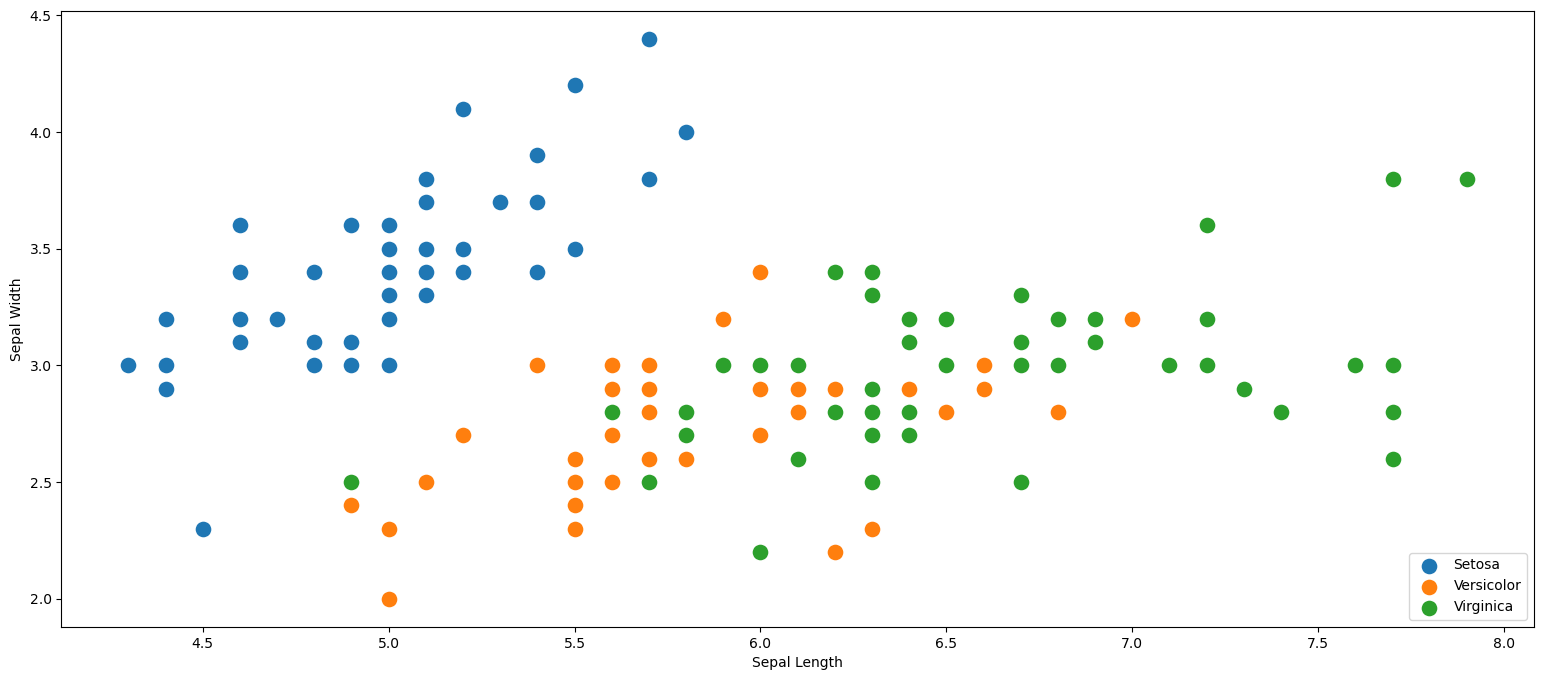

In [60]:
sns.scatterplot(data=iris_setosa, x='sepal length (cm)', y='sepal width (cm)',s=150)
sns.scatterplot(data=iris_versicolor, x='sepal length (cm)', y='sepal width (cm)', s=150)
sns.scatterplot(data=iris_virginica, x='sepal length (cm)', y='sepal width (cm)', s=150)
plt.legend(['Setosa', 'Versicolor', 'Virginica'], loc='lower right')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

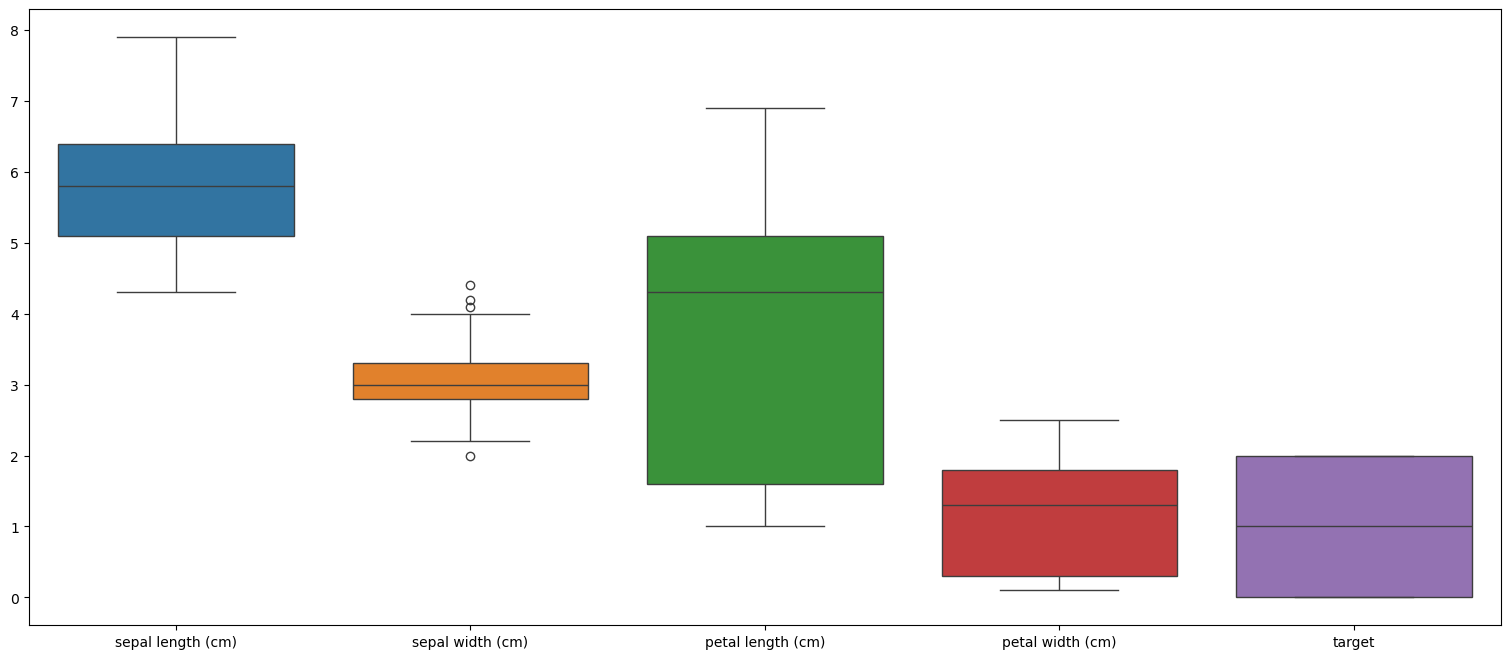

In [61]:
sns.boxplot(iris_df)
plt.show()

In [62]:
Q1=iris_df.quantile(0.25)
Q3=iris_df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
target               2.0
dtype: float64


In [63]:
ul=Q3+1.5*IQR
ll=Q1-1.5*IQR

In [64]:
iris_df=iris_df[-((iris_df<ll) | (iris_df>ul)).any(axis=1)]

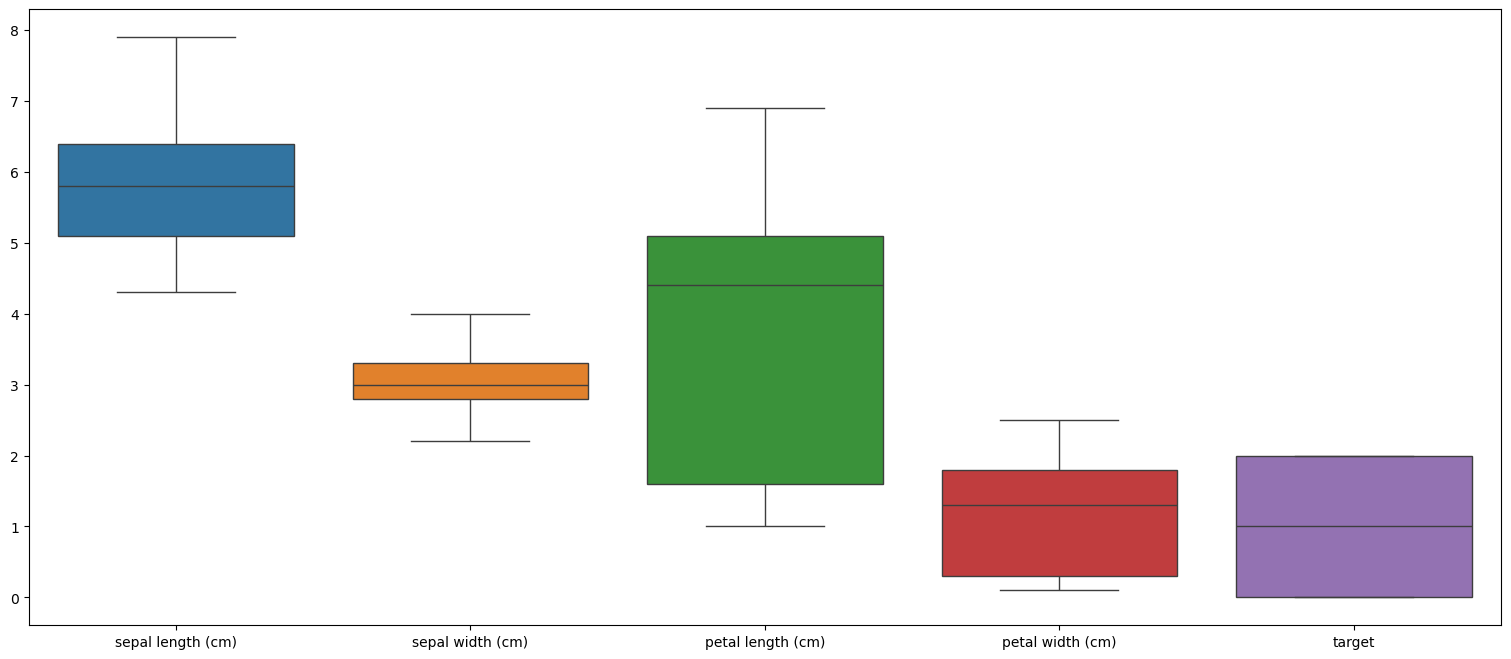

In [65]:
sns.boxplot(iris_df)
plt.show()

In [66]:
x=iris_df.loc[:, :'petal width (cm)'].values
y=iris_df.loc[:, 'target'].values

In [67]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2,random_state=1)

In [70]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [71]:
model.score(x_train, y_train)

0.9827586206896551

In [72]:
model.score(x_test, y_test)

0.9310344827586207

In [73]:
y_predict=model.predict(x_test)
y_predict

array([0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 1,
       0, 0, 2, 2, 2, 2, 1])

In [74]:
y_test

array([0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1,
       0, 0, 2, 2, 2, 2, 1])

In [75]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
cm

array([[11,  0,  0],
       [ 0,  8,  2],
       [ 0,  0,  8]], dtype=int64)

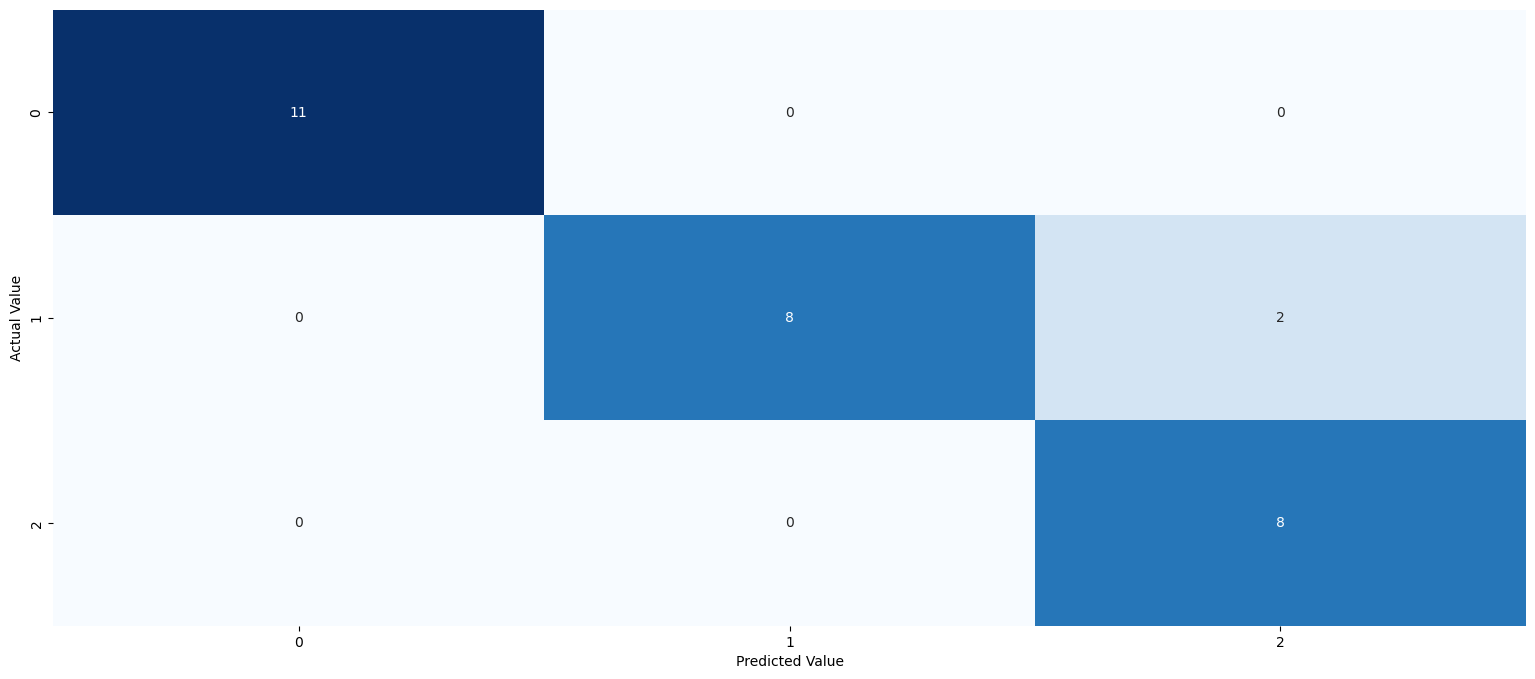

In [76]:
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, annot_kws={"fontsize":10})
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()